In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os 
import pandas as pd 

In [2]:
df = pd.read_csv('electricity-normalized.csv')

In [20]:
df.shape

(45312, 9)

In [3]:
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [21]:
df.tail(7)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
45305,0.9158,7,0.872340,0.050648,0.322821,0.003488,0.305541,0.325877,DOWN
45306,0.9158,7,0.893617,0.058875,0.340226,0.004049,0.276541,0.351754,DOWN
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP
45311,0.9158,7,1.000000,0.050679,0.288753,0.003542,0.355256,0.231140,DOWN


In [22]:
df.drop(['date'],axis=1)

,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...
45307,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB


In [18]:
df.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

In [5]:
numeric_columns = ['nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']
statistics = df[numeric_columns].describe()
print(statistics)

           nswprice     nswdemand      vicprice     vicdemand      transfer
count  45312.000000  45312.000000  45312.000000  45312.000000  45312.000000
mean       0.057868      0.425418      0.003467      0.422915      0.500526
std        0.039991      0.163323      0.010213      0.120965      0.153373
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.035127      0.309134      0.002277      0.372346      0.414912
50%        0.048652      0.443693      0.003467      0.422915      0.414912
75%        0.074336      0.536001      0.003467      0.469252      0.605702
max        1.000000      1.000000      1.000000      1.000000      1.000000


In [25]:
df.groupby(by='day').count()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
day,,,,,,,,
1,6432,6432,6432,6432,6432,6432,6432,6432
2,6480,6480,6480,6480,6480,6480,6480,6480
3,6480,6480,6480,6480,6480,6480,6480,6480
4,6480,6480,6480,6480,6480,6480,6480,6480
5,6480,6480,6480,6480,6480,6480,6480,6480
6,6480,6480,6480,6480,6480,6480,6480,6480
7,6480,6480,6480,6480,6480,6480,6480,6480


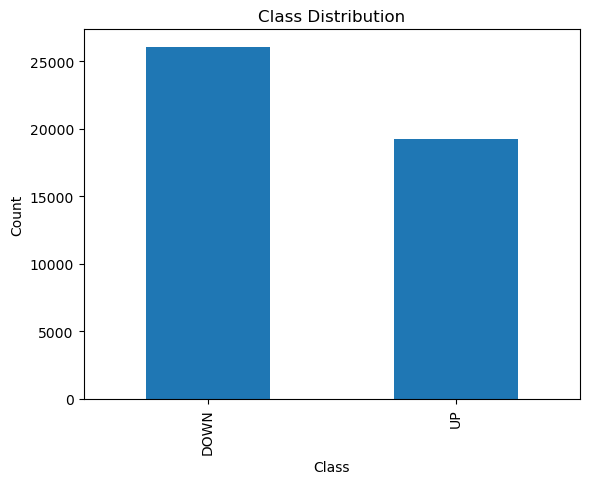

In [6]:
plt.title('Class Distribution')
df['class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

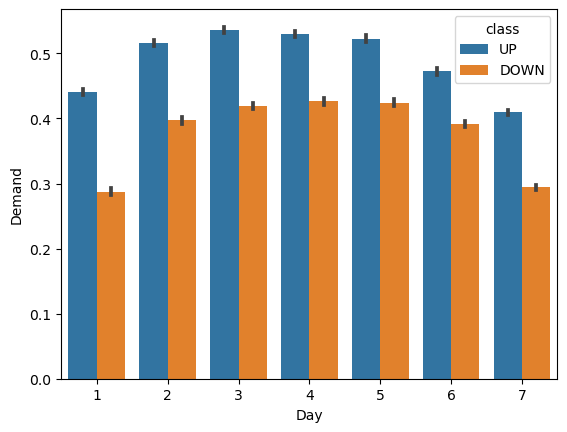

In [7]:
sns.barplot(data=df, x='day', y='nswdemand', hue='class')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.show()

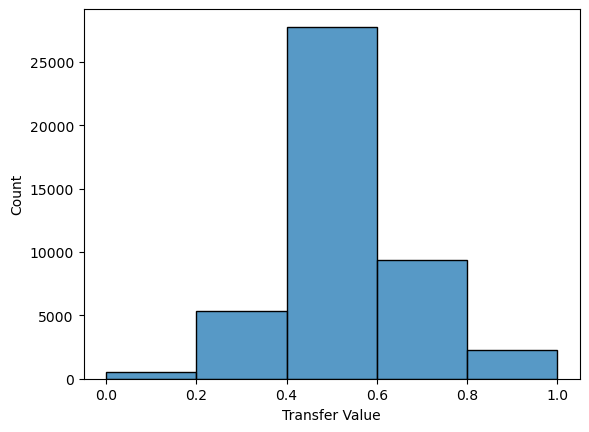

In [8]:
sns.histplot(data=df, x='transfer', bins=5)
plt.xlabel('Transfer Value')
plt.ylabel('Count')
plt.show()

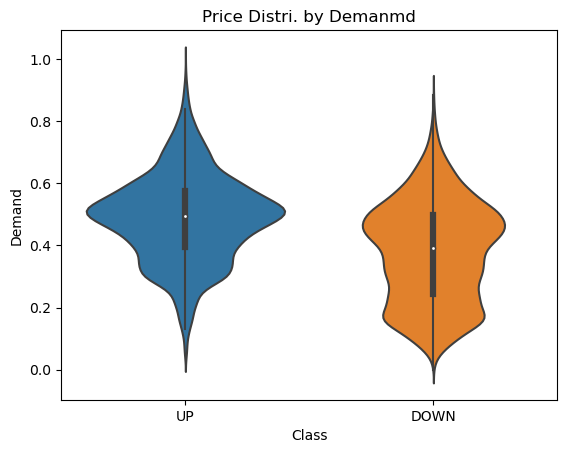

In [9]:
plt.title('Price Distri. by Demanmd')
sns.violinplot(data=df, x='class', y='nswdemand')
plt.xlabel('Class')
plt.ylabel('Demand')
plt.show()

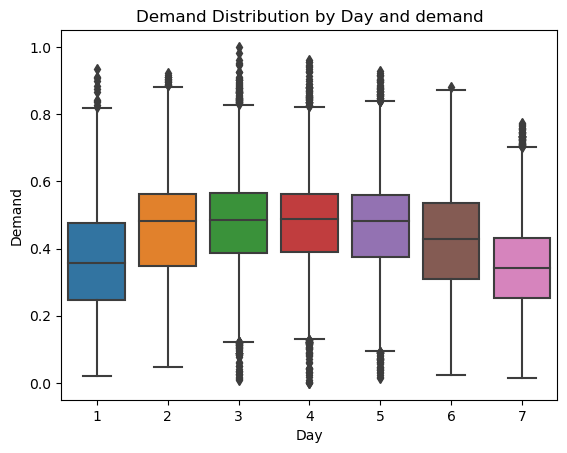

In [10]:
sns.boxplot(data=df, x='day', y='nswdemand')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.title('Demand Distribution by Day and demand')
plt.show()

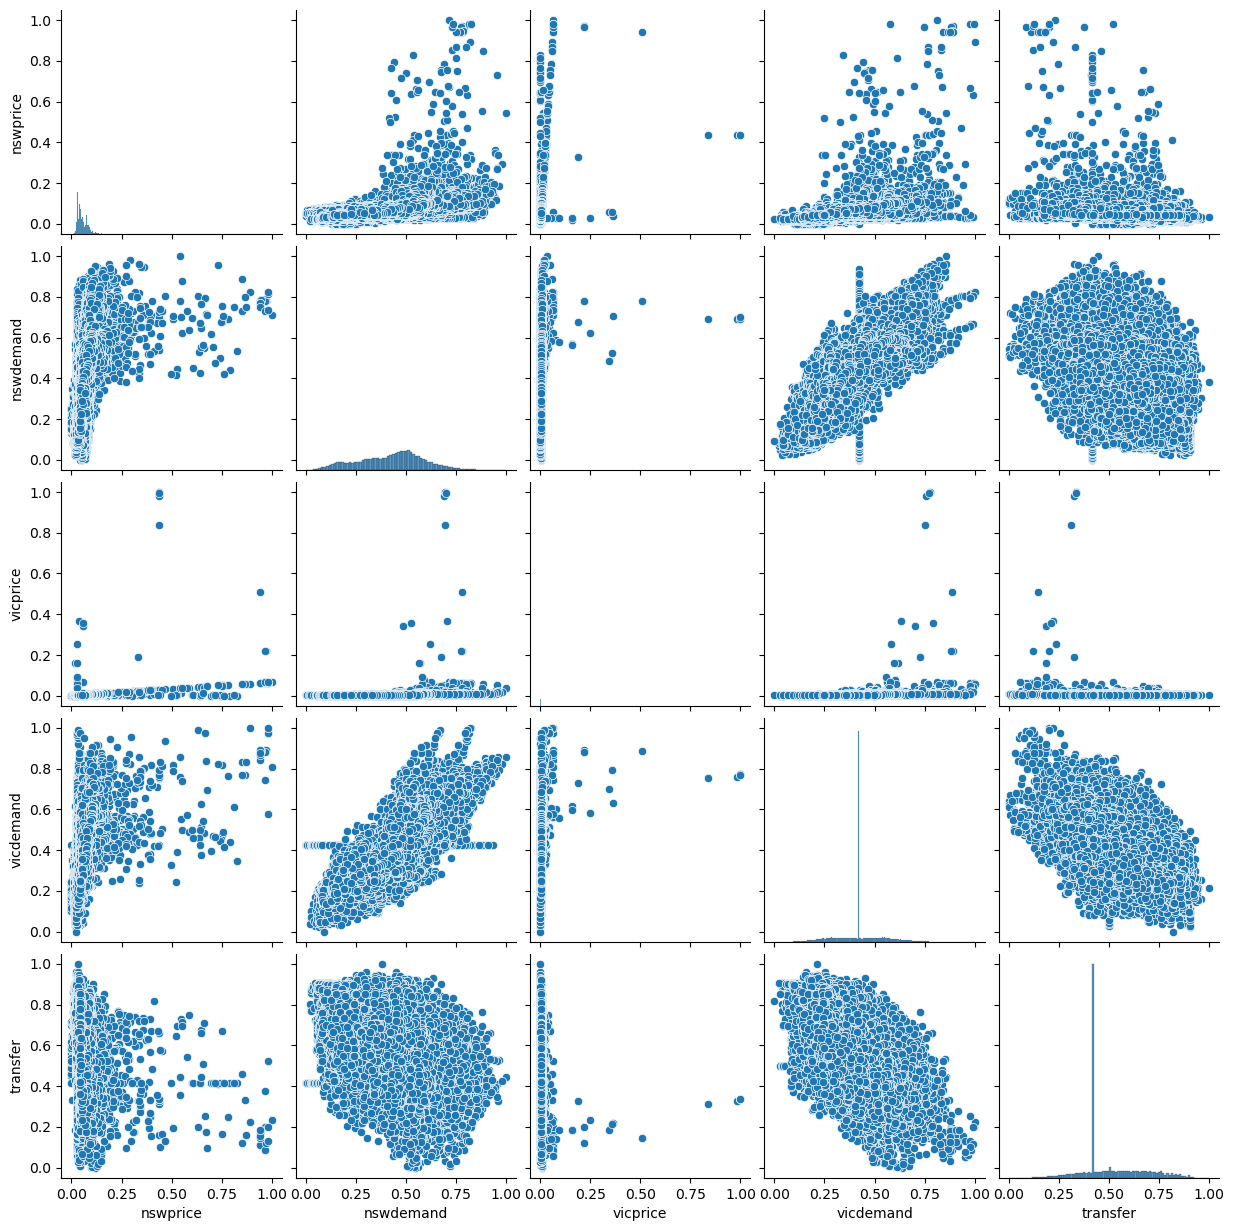

In [12]:
sns.pairplot(data=df[['nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']])
plt.show()

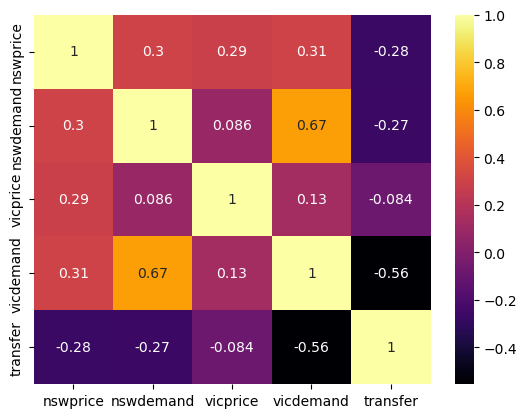

In [11]:
corr = df[['nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']].corr()
sns.heatmap(corr, annot=True, cmap='inferno')
plt.show()

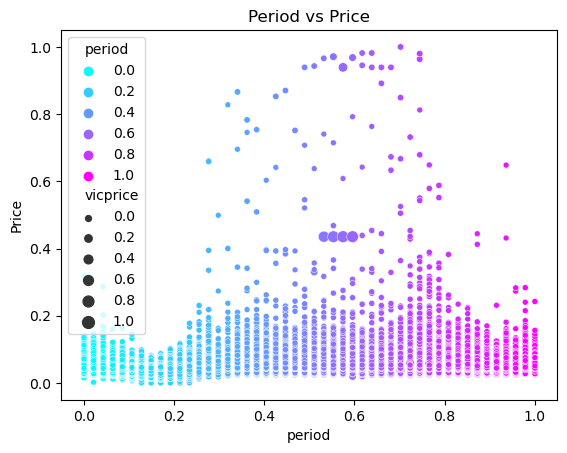

In [12]:
sns.scatterplot(data=df, x='period', y='nswprice', hue='period', palette='cool', size='vicprice')
plt.xlabel('period')
plt.ylabel('Price')
plt.title('Period vs Price')
plt.show()

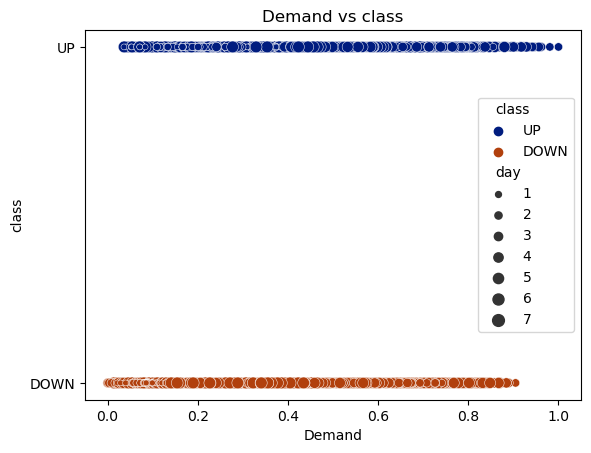

In [13]:
sns.scatterplot(data=df, x='nswdemand', y='class', hue='class', palette='dark', size='day')
plt.xlabel('Demand')
plt.ylabel('class')
plt.title('Demand vs class')
plt.show()

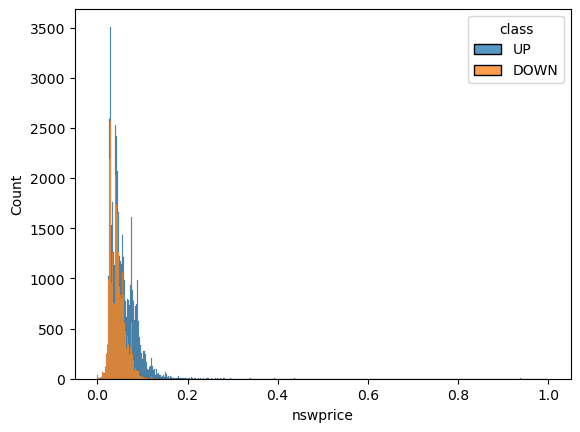

In [17]:
sns.histplot(data=df, x='nswprice', hue ='class' ,multiple='stack')
plt.show()
